In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
tips = sns.load_dataset('tips')
print (tips.head() )

"""
total_bill : Cette colonne représente le montant total de la facture.
tip : Cette colonne représente le pourboire donné pour la facture.
size : Nombre de personnes dans le groupe qui a payé la facture.
"""

# ré-initialiser les index pour construire un dataframe avex smoker et tip 
tips_smokers = tips.groupby( 'smoker', observed=False )['tip'].sum().reset_index()
tips_smokers

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


,smoker,tip
0,Yes,279.81
1,No,451.77


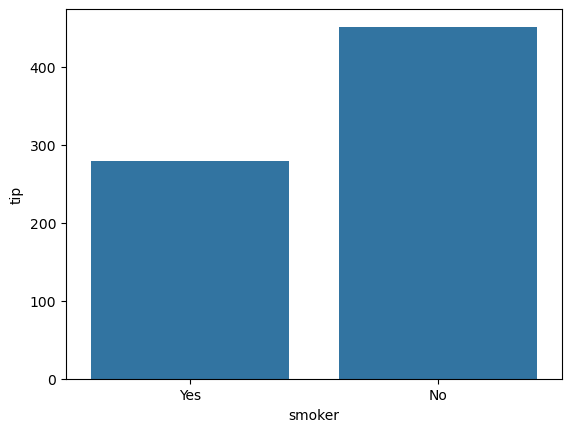

In [14]:
sns.barplot( x="smoker", y="tip", data = tips_smokers );

<Axes: xlabel='smoker', ylabel='count'>

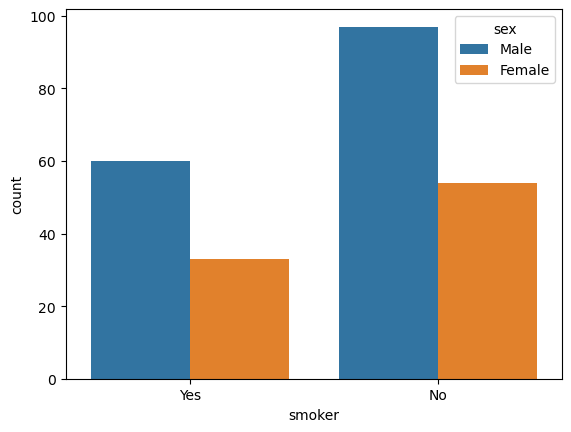

In [15]:

# Correntin - Meilleurs des solutions fait le groupby automatiquement en utilisant la fonction count d'agrégation
sns.countplot(x="smoker", hue="sex", data=tips)

In [16]:
tipsFemale = tips[ tips['sex'] == 'Female'] 
tips_smokersF = tipsFemale.groupby( 'smoker', observed=False )['tip'].sum().reset_index()

tipsMale = tips[ tips['sex'] == 'Male'] 
tips_smokersM = tipsMale.groupby( 'smoker', observed=False )['tip'].sum().reset_index()

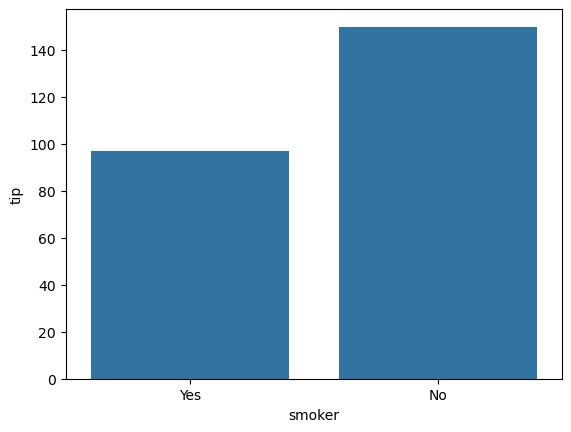

In [17]:
sns.barplot( x="smoker", y="tip", data = tips_smokersF );

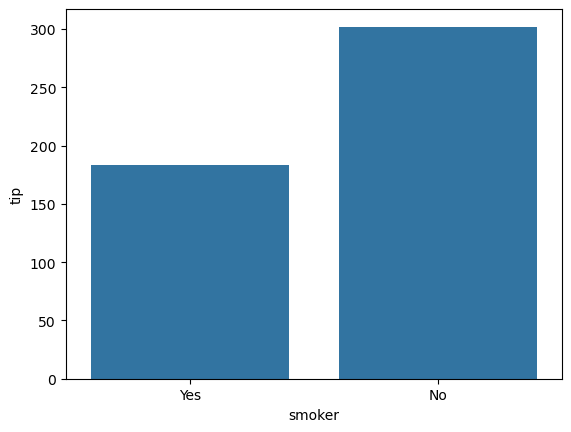

In [18]:
sns.barplot( x="smoker", y="tip", data = tips_smokersM );

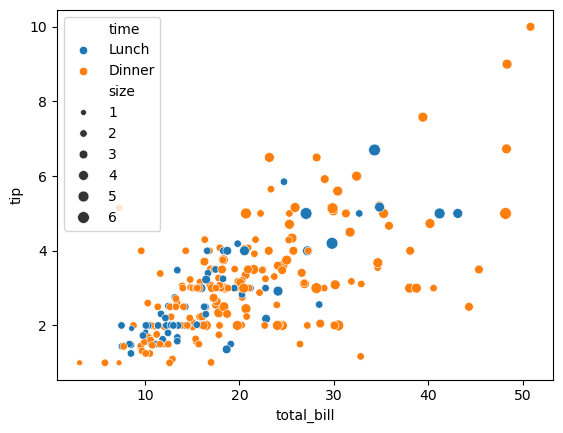

In [81]:
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips, size="size" );

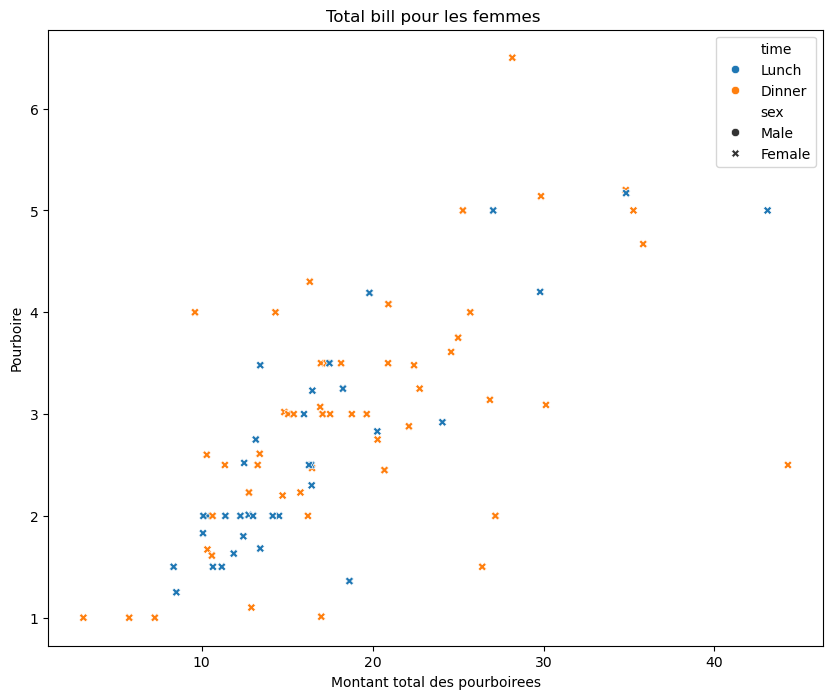

In [35]:
plt.figure( figsize = (10, 8) )
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips[tips['sex'] == 'Female' ], style="sex" )
plt.title("Total bill pour les femmes ")
plt.xlabel("Montant total des pourboirees")
plt.ylabel("Pourboire")
plt.show()

In [38]:


# Calculer la corrélation
correlation = tips["total_bill"].corr(tips["tip"])
print(f"Corrélation entre total_bill et tip: {correlation}")

Corrélation entre total_bill et tip: 0.6757341092113642


La corrélation calculée est d'environ 0.67. Cela indique que la corrélation est positive, modérée et assez forte, ce qui signifie que plus le montant de la facture est élevé, plus le pourboire est élevé.


In [39]:
# Exercice 4
tips = sns.load_dataset('tips')

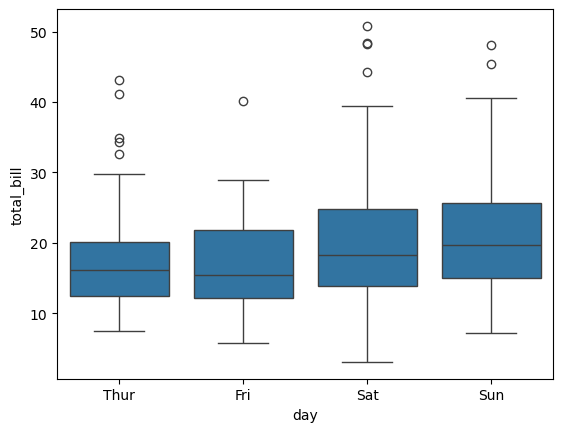

In [41]:
sns.boxplot(x="day", y="total_bill", data=tips);

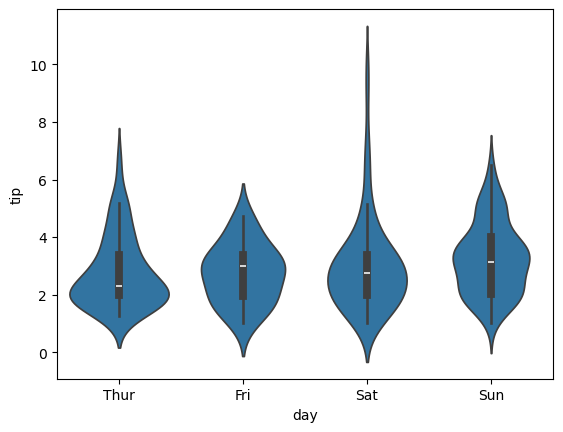

In [43]:
# Exercice 5
sns.violinplot(x="day", y="tip", data=tips);

In [46]:
tips['tip'].mean()

2.99827868852459

In [48]:
tips[ tips['day'] == 'Sat']['tip'].mean()

2.993103448275862

In [50]:
tips[ tips['day'] == 'Sun']['tip'].mean()

3.2551315789473687

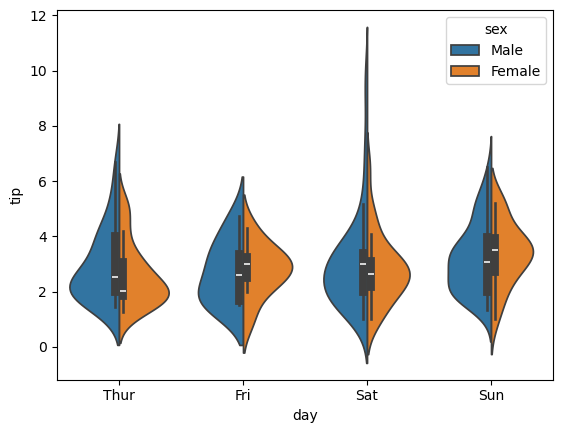

In [51]:
sns.violinplot(x="day", y="tip", hue="sex",split=True, data=tips);

In [53]:
# Exercice Les données du titanic
titanic = sns.load_dataset('titanic')

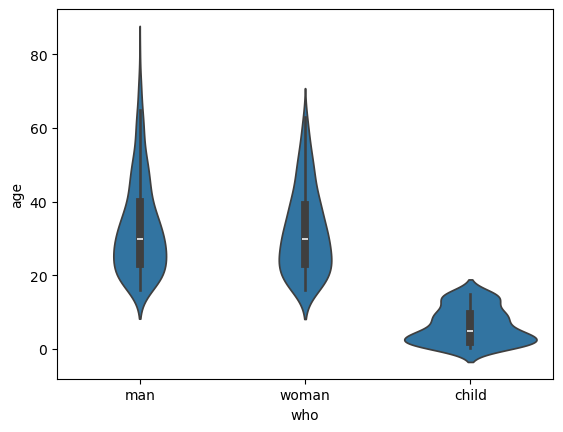

In [54]:
sns.violinplot(x="who", y="age", data=titanic);

In [55]:
(titanic['age'] < 0).sum()

0

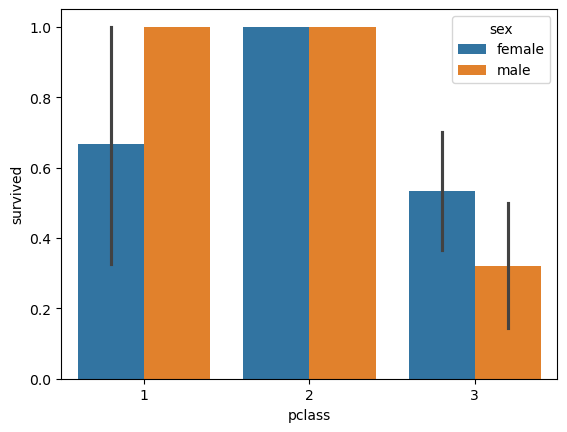

In [64]:
# Survie des enfants par classe et sexe
# titanic.head()
child = titanic[titanic['who'] == 'child'] 
sns.barplot(x="pclass", y="survived", hue="sex", data=child);

In [75]:
(titanic['age'] < 16).sum() # on est un child si on a moins de 16

83

In [67]:
child['age'].count()

83

In [68]:
titanic['child'] = titanic['age'] < 18 

In [70]:
titanic['child'].count()

891

In [71]:
child.count()

survived       83
pclass         83
sex            83
age            83
sibsp          83
parch          83
fare           83
embarked       83
class          83
who            83
adult_male     83
deck           13
embark_town    83
alive          83
alone          83
dtype: int64